In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,mean_squared_error
from sklearn.linear_model import LogisticRegression as LGR

In [2]:
df = pd.read_csv("final_merged_data.csv")
df.head()

,11327.63152,25910.84442,43378.98526,58395.89062,69898.00435,77159.57087,79841.02606,78060.99773,72461.89382,64286.21473,...,58895.9625.1,63294.80853.1,66368.91166.1,66607.25635.1,63104.26306.1,55512.82474.1,43977.13703.1,29062.20243.1,14196.07963,2
0,25910.84442,50385.60659,75902.83198,93983.10486,106743.4806,113379.6541,113636.1901,107897.3658,97274.97772,83725.13490,...,80512.38924,83979.85846,85083.07250,82110.52000,74128.65152,60918.04342,42883.075900,22041.734920,4977.52407,2
1,43378.98526,75902.83198,104936.11140,122308.29530,133184.4936,136844.7038,133198.0938,122880.6917,107355.56140,89064.45376,...,88082.89060,88442.51288,85844.37982,78700.00941,66246.61402,48473.74939,26024.829120,3739.359447,10764.34005,2
2,58395.89062,93983.10486,122308.29530,136073.03290,143093.3710,142804.2869,135252.4698,121193.6406,102189.72750,80763.18466,...,79600.08099,75822.91524,69225.16000,58536.26122,43239.97382,23504.85292,1331.277842,19186.327280,26687.23987,2
3,69898.00435,106743.48060,133184.49360,143093.37100,146266.5955,142304.4419,131395.4470,114411.3246,92985.75952,69627.49657,...,68586.07940,61339.02537,51466.97342,38041.40512,20802.74036,1272.78751,23504.852920,38817.712700,39837.91051,2
4,77159.57087,113379.65410,136844.70380,142804.28690,142304.4419,135128.0081,121618.4355,102762.9434,80231.54905,56397.17419,...,55702.83126,45783.32521,33499.55167,18274.45518,1259.71861,20802.74036,43239.973820,54434.030670,49580.74989,2


In [3]:
df.isnull().mean().sum()

0.0

In [4]:
df.dtypes

11327.63152      float64
25910.84442      float64
43378.98526      float64
58395.89062      float64
69898.00435      float64
                  ...   
55512.82474.1    float64
43977.13703.1    float64
29062.20243.1    float64
14196.07963      float64
2                  int64
Length: 65, dtype: object

In [5]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [6]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1].values
X.head()


,11327.63152,25910.84442,43378.98526,58395.89062,69898.00435,77159.57087,79841.02606,78060.99773,72461.89382,64286.21473,...,55189.61722.1,58895.9625.1,63294.80853.1,66368.91166.1,66607.25635.1,63104.26306.1,55512.82474.1,43977.13703.1,29062.20243.1,14196.07963
0,25910.84442,50385.60659,75902.83198,93983.10486,106743.4806,113379.6541,113636.1901,107897.3658,97274.97772,83725.13490,...,77081.36941,80512.38924,83979.85846,85083.07250,82110.52000,74128.65152,60918.04342,42883.075900,22041.734920,4977.52407
1,43378.98526,75902.83198,104936.11140,122308.29530,133184.4936,136844.7038,133198.0938,122880.6917,107355.56140,89064.45376,...,87104.78465,88082.89060,88442.51288,85844.37982,78700.00941,66246.61402,48473.74939,26024.829120,3739.359447,10764.34005
2,58395.89062,93983.10486,122308.29530,136073.03290,143093.3710,142804.2869,135252.4698,121193.6406,102189.72750,80763.18466,...,82519.10593,79600.08099,75822.91524,69225.16000,58536.26122,43239.97382,23504.85292,1331.277842,19186.327280,26687.23987
3,69898.00435,106743.48060,133184.49360,143093.37100,146266.5955,142304.4419,131395.4470,114411.3246,92985.75952,69627.49657,...,74769.16289,68586.07940,61339.02537,51466.97342,38041.40512,20802.74036,1272.78751,23504.852920,38817.712700,39837.91051
4,77159.57087,113379.65410,136844.70380,142804.28690,142304.4419,135128.0081,121618.4355,102762.9434,80231.54905,56397.17419,...,64400.06267,55702.83126,45783.32521,33499.55167,18274.45518,1259.71861,20802.74036,43239.973820,54434.030670,49580.74989


In [7]:
X.head()

,11327.63152,25910.84442,43378.98526,58395.89062,69898.00435,77159.57087,79841.02606,78060.99773,72461.89382,64286.21473,...,55189.61722.1,58895.9625.1,63294.80853.1,66368.91166.1,66607.25635.1,63104.26306.1,55512.82474.1,43977.13703.1,29062.20243.1,14196.07963
0,25910.84442,50385.60659,75902.83198,93983.10486,106743.4806,113379.6541,113636.1901,107897.3658,97274.97772,83725.13490,...,77081.36941,80512.38924,83979.85846,85083.07250,82110.52000,74128.65152,60918.04342,42883.075900,22041.734920,4977.52407
1,43378.98526,75902.83198,104936.11140,122308.29530,133184.4936,136844.7038,133198.0938,122880.6917,107355.56140,89064.45376,...,87104.78465,88082.89060,88442.51288,85844.37982,78700.00941,66246.61402,48473.74939,26024.829120,3739.359447,10764.34005
2,58395.89062,93983.10486,122308.29530,136073.03290,143093.3710,142804.2869,135252.4698,121193.6406,102189.72750,80763.18466,...,82519.10593,79600.08099,75822.91524,69225.16000,58536.26122,43239.97382,23504.85292,1331.277842,19186.327280,26687.23987
3,69898.00435,106743.48060,133184.49360,143093.37100,146266.5955,142304.4419,131395.4470,114411.3246,92985.75952,69627.49657,...,74769.16289,68586.07940,61339.02537,51466.97342,38041.40512,20802.74036,1272.78751,23504.852920,38817.712700,39837.91051
4,77159.57087,113379.65410,136844.70380,142804.28690,142304.4419,135128.0081,121618.4355,102762.9434,80231.54905,56397.17419,...,64400.06267,55702.83126,45783.32521,33499.55167,18274.45518,1259.71861,20802.74036,43239.973820,54434.030670,49580.74989


In [8]:
df.dtypes

11327.63152      float64
25910.84442      float64
43378.98526      float64
58395.89062      float64
69898.00435      float64
                  ...   
55512.82474.1    float64
43977.13703.1    float64
29062.20243.1    float64
14196.07963      float64
2                  int64
Length: 65, dtype: object

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
scaled=scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled, columns=X.columns)
X_scaled.head()

,11327.63152,25910.84442,43378.98526,58395.89062,69898.00435,77159.57087,79841.02606,78060.99773,72461.89382,64286.21473,...,55189.61722.1,58895.9625.1,63294.80853.1,66368.91166.1,66607.25635.1,63104.26306.1,55512.82474.1,43977.13703.1,29062.20243.1,14196.07963
0,-1.644381,-0.871902,-0.183693,0.309164,0.594076,0.768428,0.888573,1.000645,1.133470,1.296487,...,1.692904,1.175258,0.743232,0.446059,0.200510,-0.077923,-0.447041,-0.985038,-1.609951,-2.311442
1,-0.597375,0.131823,0.680097,1.024852,1.195480,1.277414,1.320016,1.370386,1.435661,1.502532,...,2.163327,1.467996,0.878092,0.465047,0.124362,-0.251294,-0.734310,-1.416655,-2.198799,-2.033229
2,0.302709,0.843014,1.196950,1.372643,1.420859,1.406685,1.365326,1.328755,1.280802,1.182185,...,1.948110,1.139981,0.496734,0.050548,-0.325840,-0.757341,-1.310701,-2.048878,-1.701819,-1.267705
3,0.992124,1.344946,1.520535,1.550024,1.493034,1.395842,1.280258,1.161389,1.004890,0.752456,...,1.584387,0.714089,0.059037,-0.392358,-0.783434,-1.250864,-1.823914,-1.481174,-1.070212,-0.635461
4,1.427368,1.605981,1.629433,1.542720,1.402915,1.240177,1.064624,0.873944,0.622550,0.241895,...,1.097741,0.215917,-0.411048,-0.840483,-1.224777,-1.680727,-1.373077,-0.975900,-0.567783,-0.167055


# PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

Xcomponents =pca.fit_transform(X_scaled)
X_scaled= pd.DataFrame(Xcomponents,columns=[i for i in range(0,5)])
X_scaled.head()

,0,1,2,3,4
0,-7.105552,-2.427527,-0.157718,5.274097,-0.493845
1,-9.373418,-4.406243,-1.053577,4.144214,-0.461934
2,-8.801752,-6.047700,-2.038466,2.426055,-0.176918
3,-7.841568,-6.826342,-3.164458,0.655747,0.346147
4,-6.460043,-6.789864,-4.225811,-0.757326,0.967872


In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X_scaled,Y,test_size=0.2)


# LDA

In [15]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lda = LDA(n_components=1)
# train_x= lda.fit_transform(train_x,train_y)
# test_x=lda.transform(test_x)


In [16]:

#  train_x

# random forest

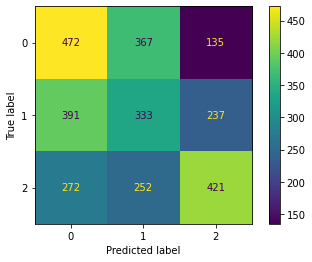

In [17]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model=classifier.fit(train_x, train_y)  
pred_y=classifier.predict(test_x)
pred_y
  
cm= confusion_matrix(test_y, pred_y) 
cm
acc=accuracy_score(test_y,pred_y)

disp = ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [18]:
acc

0.42569444444444443

In [19]:
classification_report(pred_y,test_y)

'              precision    recall  f1-score   support\n\n           0       0.48      0.42      0.45      1135\n           1       0.35      0.35      0.35       952\n           2       0.45      0.53      0.48       793\n\n    accuracy                           0.43      2880\n   macro avg       0.43      0.43      0.43      2880\nweighted avg       0.43      0.43      0.42      2880\n'

# logistic regression

In [20]:

model = LGR(solver='liblinear', random_state=0)
model.fit(test_x,test_y)
pred_y=model.predict(test_x)
acc=accuracy_score(test_y,pred_y)
acc

0.3524305555555556

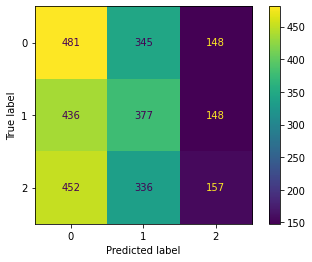

In [21]:
cm=confusion_matrix(test_y,pred_y)
disp = ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot()
plt.show()

# naive bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
 
#Fitting the data to the classifier
naive_bayes.fit(train_x , train_y)
 
#Predict on test data
pred_y = naive_bayes.predict(test_x)
acc=accuracy_score(test_y,pred_y)
acc

0.3138888888888889

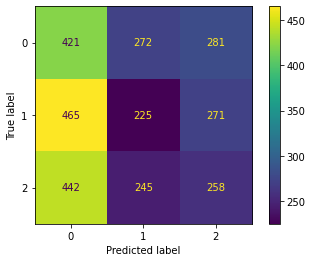

In [23]:
cm= confusion_matrix(test_y, pred_y) 
cm

disp = ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot()
plt.show()

# Using K-NN  Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(train_x, train_y) 

KNeighborsClassifier()

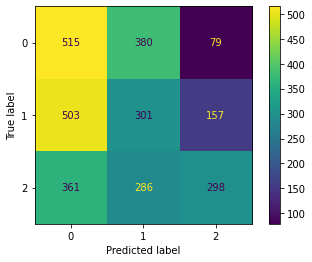

In [25]:
pred_y= classifier.predict(test_x) 

cm= confusion_matrix(test_y, pred_y) 
cm


disp = ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [26]:
acc=accuracy_score(test_y,pred_y)
acc

0.38680555555555557

In [27]:
classification_report(pred_y,test_y)

'              precision    recall  f1-score   support\n\n           0       0.53      0.37      0.44      1379\n           1       0.31      0.31      0.31       967\n           2       0.32      0.56      0.40       534\n\n    accuracy                           0.39      2880\n   macro avg       0.39      0.41      0.38      2880\nweighted avg       0.42      0.39      0.39      2880\n'

# using linear kernel

In [28]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
model=svm.fit(train_x,train_y)
pred_y = model.predict(test_x)
acc = accuracy_score(test_y,pred_y)
con = confusion_matrix(test_y,pred_y)

con

array([[434, 369, 171],
       [468, 317, 176],
       [449, 330, 166]], dtype=int64)

In [29]:
acc

0.31840277777777776

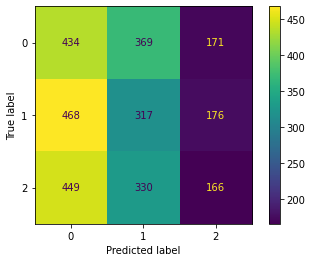

In [30]:
disp = ConfusionMatrixDisplay(con,display_labels=model.classes_)
disp.plot()
plt.show()

In [31]:
classification_report(pred_y,test_y)

'              precision    recall  f1-score   support\n\n           0       0.45      0.32      0.37      1351\n           1       0.33      0.31      0.32      1016\n           2       0.18      0.32      0.23       513\n\n    accuracy                           0.32      2880\n   macro avg       0.32      0.32      0.31      2880\nweighted avg       0.36      0.32      0.33      2880\n'

# Using Rbf kernel

In [32]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
model=svm.fit(train_x,train_y)
pred_y = model.predict(test_x)
acc = accuracy_score(test_y,pred_y)
acc

0.29930555555555555

In [33]:
con = confusion_matrix(test_y,pred_y)

con

array([[253, 433, 288],
       [306, 378, 277],
       [284, 430, 231]], dtype=int64)

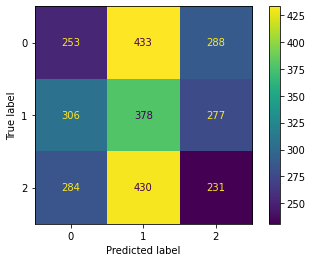

In [34]:
disp = ConfusionMatrixDisplay(con,display_labels=model.classes_)
disp.plot()
plt.show()

# Elastic regression

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,mean_squared_error,mean_absolute_error,r2_score
reg=ElasticNet(alpha=0.5,l1_ratio=0.7)
reg.fit(train_x,train_y)
pred_y=reg.predict(test_x)


In [36]:
pred_y

array([1.00243077, 1.00243077, 1.00243077, ..., 1.00243077, 1.00243077,
       1.00243077])

In [37]:
test_x.head()

,0,1,2,3,4
11948,-2.807810,-5.445726,2.959812,0.529259,1.732979
2671,-0.067915,-6.091807,-1.818794,-2.026037,0.429809
2430,-1.706151,3.404329,0.067562,5.539104,0.091563
13268,-2.822624,2.639045,5.575342,0.489073,-3.232967
13306,-4.673442,7.201158,-4.592666,-1.026115,-0.268961


In [38]:
mean_squared_error(test_y,pred_y)

0.6663743060081703

In [39]:
mean_absolute_error(test_y,pred_y)

0.6671550204493061